# Ensemble Techniques Project

Parkinson’s Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.

The data & attributes information for this project is available at -

https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/ (Links to an external site.)Links to an external site.

The data consists of those diagnosed with Parkinson Disease and those who do not.

Steps to be followed:

1. Load the data set

2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points) 

Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

## 1. Load the data set

In [1]:
#Importing numpy, pandas, matplotlip, seaborn libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Loading dataset
df = pd.read_csv('parkinsons.data')
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


## 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. (2.5 points)

In [3]:
#Let's read the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
name                195 non-null object
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
status              195 non-null int64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null floa

In [4]:
#We have 195 records, 23 features (out of which 22 are continuous & 1 i.e. name is categorical data) & we have 2-class target variable

#Since, name is only representative. Let's make it as index of our Dataset
df.set_index('name', inplace=True)

#Now, we only have numeric features & we need not handle categorical data.
#Also, we don't have any missing values. But, 22 features for 195 records can create curse-of-dimensionality problem.
#We might need to use Feature-selction technique to avoid curse-of-dimensionality

## 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? (15 points)

In [5]:
#Now, let's do 5-point analysis of the features to study uni-variate analysis & check individual attributes for their basic statistic
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [6]:
#There are no missing values

#Let's study each column's distribution:
#MDVP:Fo(Hz): Right skewed
#MDVP:Fhi(Hz): Highly right skewed with long right tail & presence of some outliers
#MDVP:Flo(Hz): Right skewed with few outliers on right tail
#MDVP:Jitter(%): Highly right skewed with long right tail & presence of some outliers
#MDVP:Jitter(Abs): Highly right skewed with long right tail & presence of some outliers
#MDVP:RAP: Highly right skewed with long right tail & presence of some outliers
#MDVP:PPQ: Highly right skewed with long right tail & presence of some outliers
#Jitter:DDP: Highly right skewed with long right tail & presence of some outliers
#MDVP:Shimmer: Highly right skewed with long right tail & presence of some outliers
#MDVP:Shimmer(dB): Highly right skewed with long right tail & presence of some outliers
#Shimmer:APQ3: Right skewed with few outliers on right tail
#Shimmer:APQ5: Highly right skewed with long right tail & presence of some outliers
#MDVP:APQ: Highly right skewed with long right tail & presence of some outliers
#Shimmer:DDA: Highly right skewed with long right tail & presence of some outliers
#NHR: Highly right skewed with long right tail & presence of some outliers
#HNR: Left skewed with few outliers on left tail
#status: This is target column & we have more than 75% of the records with Parkinson Disease found. This is good as that is our model's main aim to diagnose Parkinson Disease.
#RPDE: Seems to be normally distributed
#DFA: Seems to be normally distributed
#spread1: Slightly right skewed with few outliers on either side
#spread2: Slightly right skewed with few outliers on either side
#D2: Slightly right skewed with few outliers on right tail
#PPE: Right skewed with few outliers on right tail

#There are many outliers. But, since our dataset is small, we would not drop them. But, it can deteriorate model's performance significantly

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


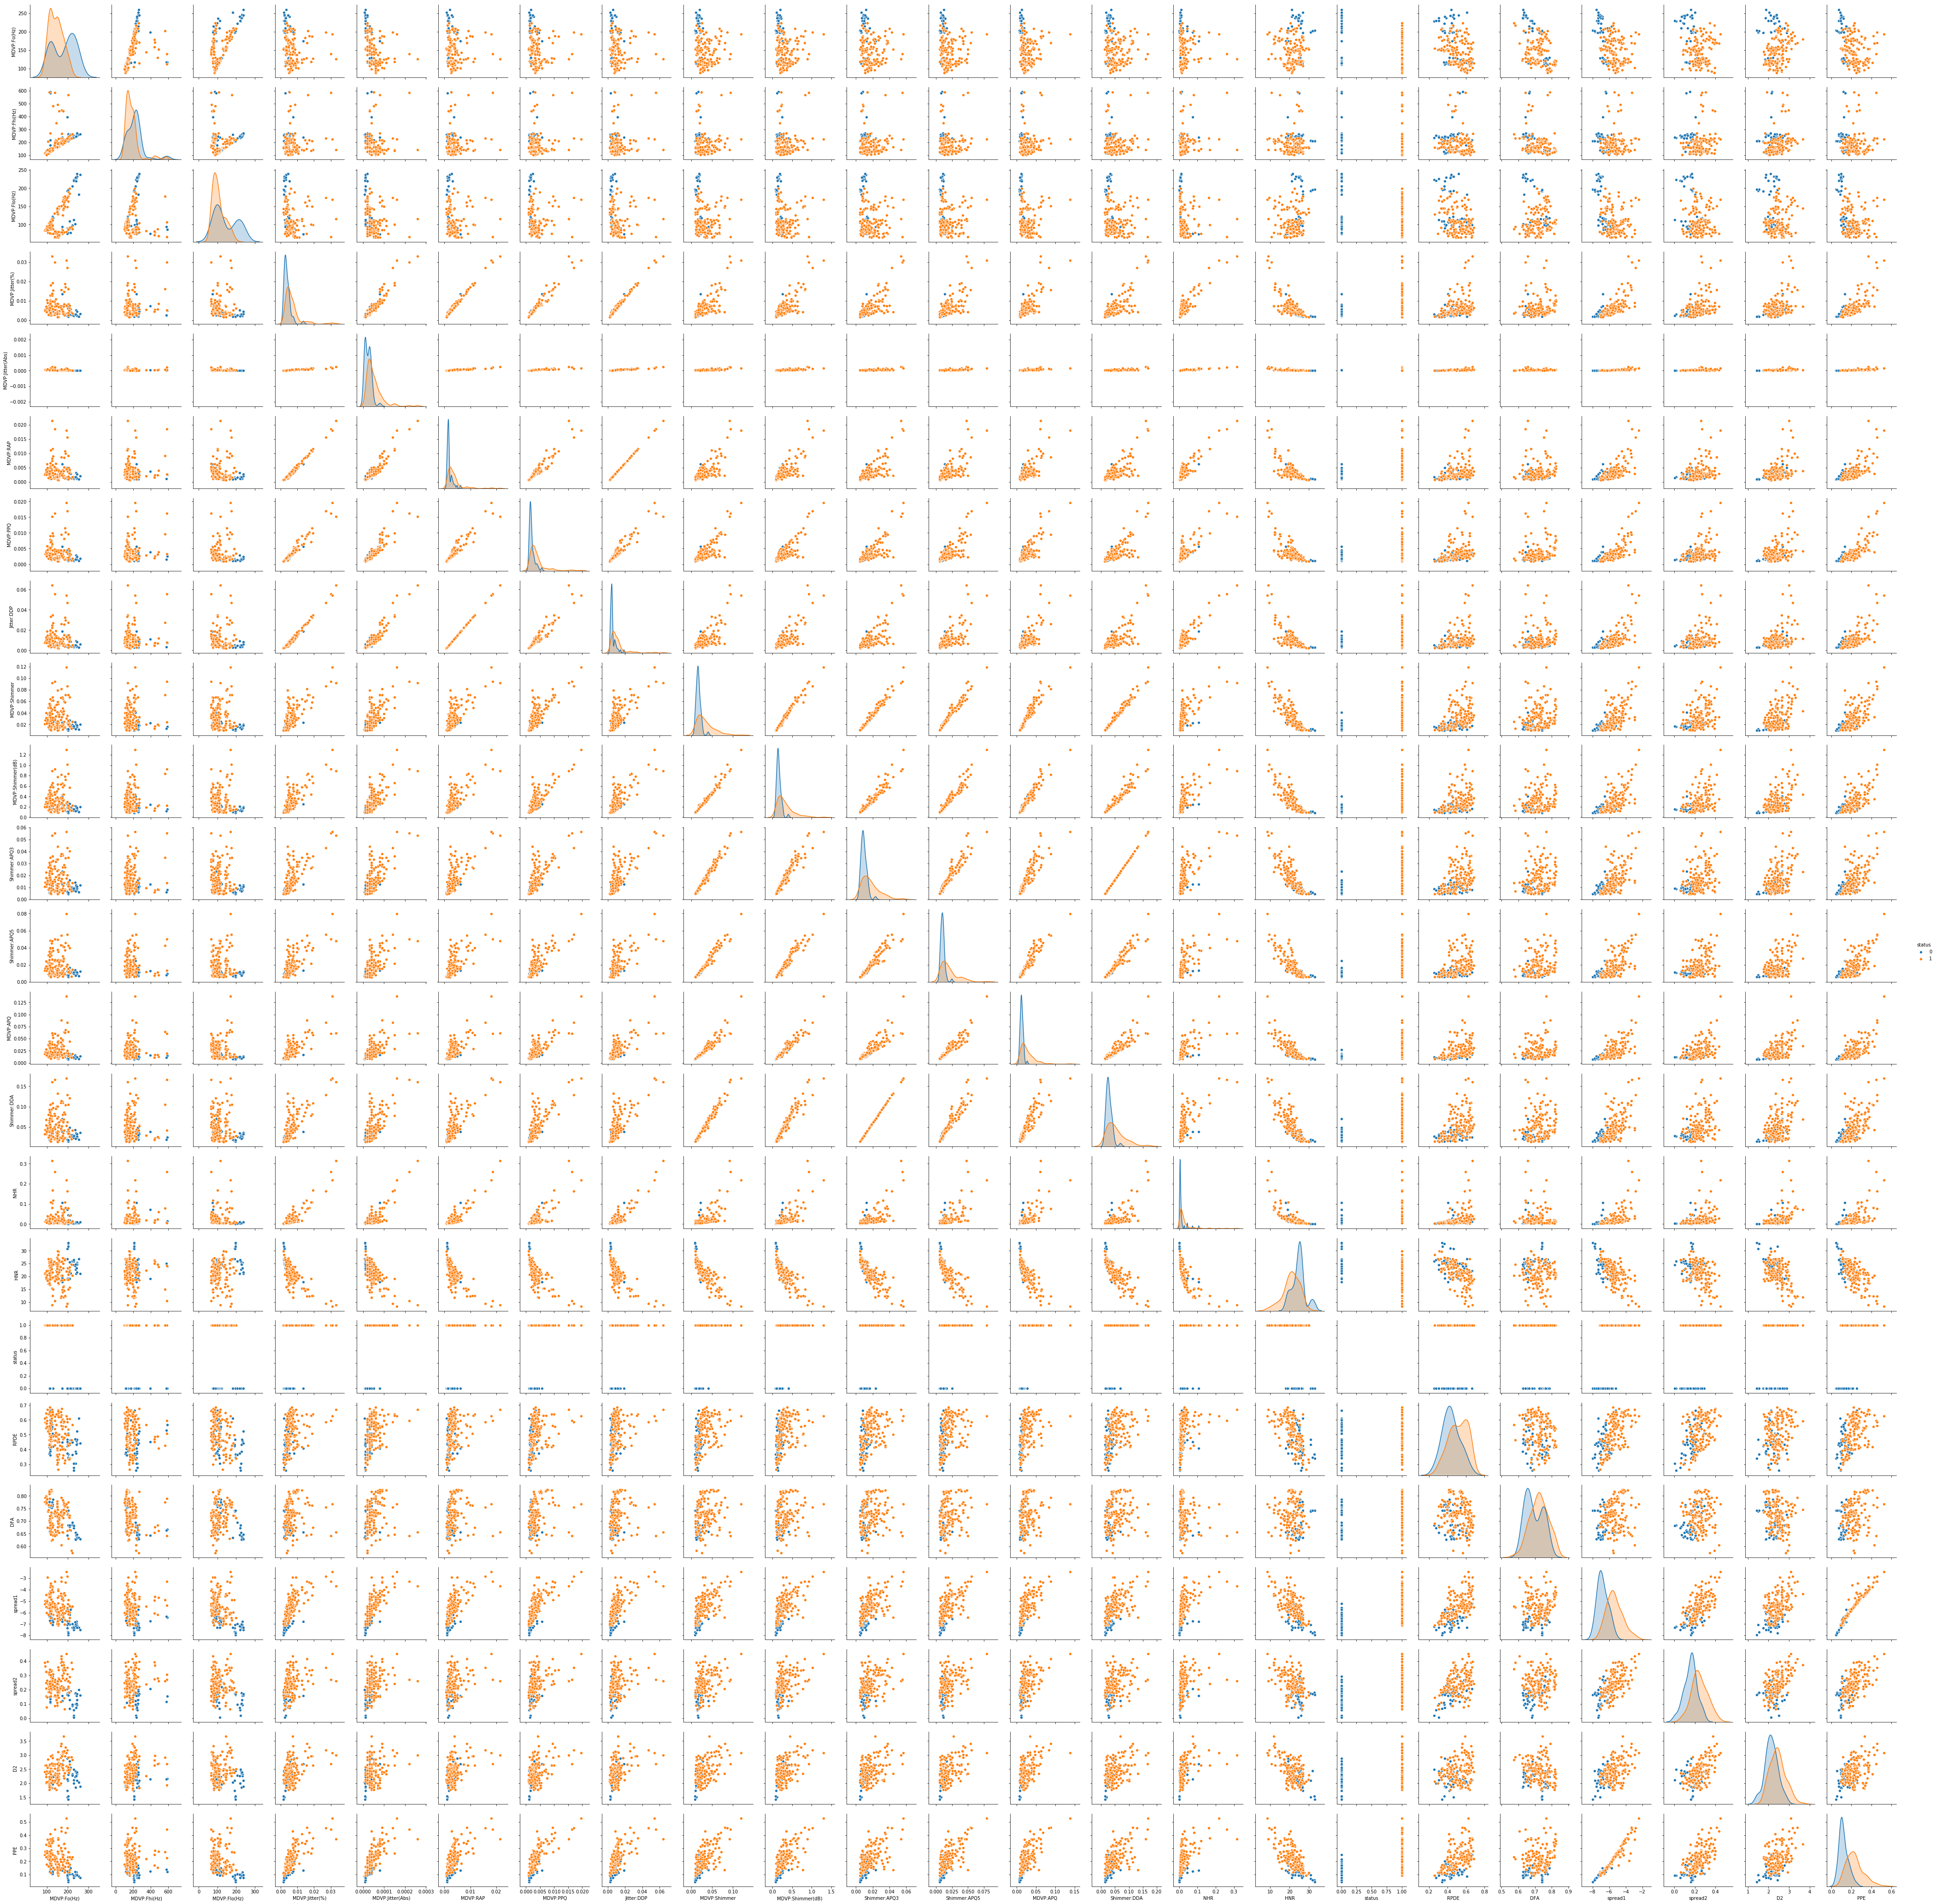

In [7]:
#Let's also study the pairplot with status as hue for bi-variate analysis
sns.pairplot(df, hue='status')
plt.show()

In [8]:
#There seems to be high-correlation between few features whereas some don't have significant correlation.
#Additionally, distribution of vocal features for patient's having Parkinson's disease & normal people do not completely overlap.
#Hence, categorisation models should have some positive results but not very accurate.

#To determine, exact correlation between features, let's also calculate correlation
correlation = df.corr()

#Let's iterate through correlation matrix to print pairs of highly correlated columns & pairs of very less correlated columns
for i in correlation.columns:
    for j in correlation.columns:
        if i == j:
            break
        if np.abs(correlation.loc[i][j]) > 0.9:
            print("Columns", i, "&", j, "are highly correlated")
        elif np.abs(correlation.loc[i][j]) < 0.1:
            print("Columns", i, "&", j, "have no significant correlation")

Columns MDVP:Flo(Hz) & MDVP:Fhi(Hz) have no significant correlation
Columns MDVP:Jitter(Abs) & MDVP:Fhi(Hz) have no significant correlation
Columns MDVP:Jitter(Abs) & MDVP:Jitter(%) are highly correlated
Columns MDVP:RAP & MDVP:Fo(Hz) have no significant correlation
Columns MDVP:RAP & MDVP:Fhi(Hz) have no significant correlation
Columns MDVP:RAP & MDVP:Jitter(%) are highly correlated
Columns MDVP:RAP & MDVP:Jitter(Abs) are highly correlated
Columns MDVP:PPQ & MDVP:Fhi(Hz) have no significant correlation
Columns MDVP:PPQ & MDVP:Flo(Hz) have no significant correlation
Columns MDVP:PPQ & MDVP:Jitter(%) are highly correlated
Columns MDVP:PPQ & MDVP:RAP are highly correlated
Columns Jitter:DDP & MDVP:Fo(Hz) have no significant correlation
Columns Jitter:DDP & MDVP:Fhi(Hz) have no significant correlation
Columns Jitter:DDP & MDVP:Jitter(%) are highly correlated
Columns Jitter:DDP & MDVP:Jitter(Abs) are highly correlated
Columns Jitter:DDP & MDVP:RAP are highly correlated
Columns Jitter:DDP &

## 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [9]:
#Importing train_test_split submodule from model_selection module in sklearn Library
from sklearn.model_selection import train_test_split

#Splitting training & testing data in ratio 70:30
X_train, X_test, y_train, y_test = train_test_split(df.drop('status', axis=1), df['status'], test_size=.30)

## 5. Create the model using “entropy” method of reducing the entropy and fit it to training data. (5 points)

In [10]:
#Importing DecisionTreeClassifier sub-module from tree module in sklearn library
from sklearn.tree import DecisionTreeClassifier

#Initializing DecisionTreeClassifier with 'entropy' criteria
dt_model = DecisionTreeClassifier(criterion = 'entropy')

#Fitting Decision Tree Model with training data
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab. (7.5 points)

In [11]:
#Print the accuracy for test data
print("Accuracy on test data is", dt_model.score(X_test, y_test))

#Print the accuracy for train data just for reference
print("Accuracy on train data just for reference is", dt_model.score(X_train, y_train))

Accuracy on test data is 0.847457627118644
Accuracy on train data just for reference is 1.0


In [12]:
#Importing confusion_matrix submodule from metrics module in sklearn library
from sklearn.metrics import confusion_matrix

#Calculate predicted values
y_predict = dt_model.predict(X_test)

#Cross-tab
print("Cross-tab of the predicted value vs actual value is:\n", confusion_matrix(y_test, y_predict))

Cross-tab of the predicted value vs actual value is:
 [[10  3]
 [ 6 40]]


## 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help? (20 points)

In [13]:
#Now we will try adjusting some of the hyper parameters like max_depth & min_sample_leaf to try to find a right tuning
min_score_diff = dt_model.score(X_train, y_train) - dt_model.score(X_test, y_test)
best_model = dt_model

for a in [2, 3, 4, 5]:
    for b in [2, 3, 4, 5]:
        dt_model = DecisionTreeClassifier(criterion = 'entropy', max_depth=a, min_samples_leaf = b)
        dt_model.fit(X_train, y_train)
        if dt_model.score(X_train, y_train) - dt_model.score(X_test, y_test) < min_score_diff:
            min_score_diff = dt_model.score(X_train, y_train) - dt_model.score(X_test, y_test)
            best_model = dt_model

In [14]:
#Print the best accuracy score & corresponding hyper-parameters
print("Accuracy score for the regularized Decision Tree is:", best_model.score(X_test, y_test), "for max_depth =", best_model.max_depth, "& min_samples_leaf =", best_model.min_samples_leaf)

#Print the accuracy for train data just for reference
print("Accuracy on train data just for reference is", best_model.score(X_train, y_train))

Accuracy score for the regularized Decision Tree is: 0.8305084745762712 for max_depth = 2 & min_samples_leaf = 2
Accuracy on train data just for reference is 0.8529411764705882


In [15]:
#As we can see regularization has reduced over-fitting on training data & as a result it generalizes well on test data
#In this case, when we regularize the Decision tree with max_depth = 2 & min_samples_leaf = 2,
#we get approximate accuracy of 83% for test data & 85% for training data which shows that it generalizes quite well without compromising much on test data accuracy

## Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result? (10 points)

In [16]:
#Import RandomForestClassifier submodule from ensemble module in sklearn library
from sklearn.ensemble import RandomForestClassifier

#Import accuracy_score submodules from metrics module from sklearn library
from sklearn.metrics import accuracy_score

best_accuracy = 0
best_rf_model = RandomForestClassifier(n_jobs=-1, n_estimators=1, criterion="entropy", random_state=9999)

for i in range(1, 501):
    model = RandomForestClassifier(n_jobs=-1, n_estimators=i, criterion="entropy", random_state=9999)
    
    #Fit model with training set
    model.fit(X_train, y_train)
    
    #Predict
    y_pred = model.predict(X_test)
    
    if accuracy_score(y_test, y_pred) > best_accuracy:
        best_accuracy = accuracy_score(y_test, y_pred)
        best_rf_model = model

In [17]:
#Predict
y_pred = best_rf_model.predict(X_test)

#Printing optimal number of trees that gives best accuracy
print("Optimal number of trees is", best_rf_model.n_estimators, "that is giving a best accuracy of", accuracy_score(y_test, y_pred))

Optimal number of trees is 139 that is giving a best accuracy of 0.9322033898305084


### Conclusion:
We can see that simple Ensemble technique like Random Forest has easily achieved better results without the headache of regularizing the Decision tree on n-number of hyper-parameters. For this example, we adjusted only 2 hyper-parameters but it has atleast around 10 such hyper-parameters.

Since we have only 195 records, splitting it into training, testing & validation data is difficult. But, if we had large dataset, we could have adjusted hyper-parameter by targetting best accuracy on validation data before finally testing on test data.

Hence, usage of Random Forest model for predicting Parkinson disease can surely help us build effective screening step prior to an appointment with a clinician.

And the accuracy of 93% achieved on test data is very good & we can target 90% accuracy on Production data which is excellent especially for screening step & it can help patients save lot of time & money & also help clinician reduce the patient's waiting time, help him/her focus on patient's treatment of Parkinson disease & he/she can even target more patients over different geographical regions which will help gain better feedback from Patients as well as better scope of revenue for the clinician.